<a href="https://colab.research.google.com/github/VenGr0/KerasLetter/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

<ipython-input-4-345c6d01b830>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


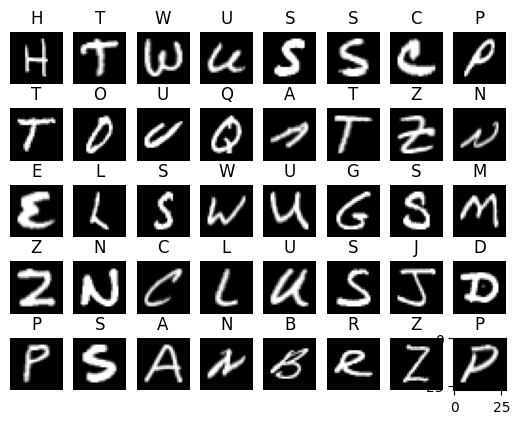

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Преобразуем метки классов в одномерные бинарные векторы
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Создаем модель
model = Sequential()

# Добавляем первый полносвязный слой
model.add(Dense(512, activation='relu', input_shape=(784,)))

# Добавляем второй полносвязный слой
model.add(Dense(256, activation='relu'))

# Добавляем выходной слой
model.add(Dense(26, activation='softmax'))

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
history = model.fit(x_train, y_train_one_hot,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test_one_hot),
                    callbacks=[EarlyStopping(patience=5)])


Epoch 1/20
2328/2328 [==============================] - 38s 16ms/step - loss: 1.0682 - accuracy: 0.8777 - val_loss: 0.2536 - val_accuracy: 0.9329
Epoch 2/20
2328/2328 [==============================] - 37s 16ms/step - loss: 0.2068 - accuracy: 0.9434 - val_loss: 0.1879 - val_accuracy: 0.9488
Epoch 3/20
2328/2328 [==============================] - 39s 17ms/step - loss: 0.1700 - accuracy: 0.9533 - val_loss: 0.1626 - val_accuracy: 0.9568
Epoch 4/20
2328/2328 [==============================] - 36s 15ms/step - loss: 0.1506 - accuracy: 0.9590 - val_loss: 0.1462 - val_accuracy: 0.9620
Epoch 5/20
2328/2328 [==============================] - 36s 16ms/step - loss: 0.1370 - accuracy: 0.9631 - val_loss: 0.1501 - val_accuracy: 0.9621
Epoch 6/20
2328/2328 [==============================] - 39s 17ms/step - loss: 0.1244 - accuracy: 0.9673 - val_loss: 0.1340 - val_accuracy: 0.9653
Epoch 7/20
2328/2328 [==============================] - 39s 17ms/step - loss: 0.1153 - accuracy: 0.9699 - val_loss: 0.1326 -

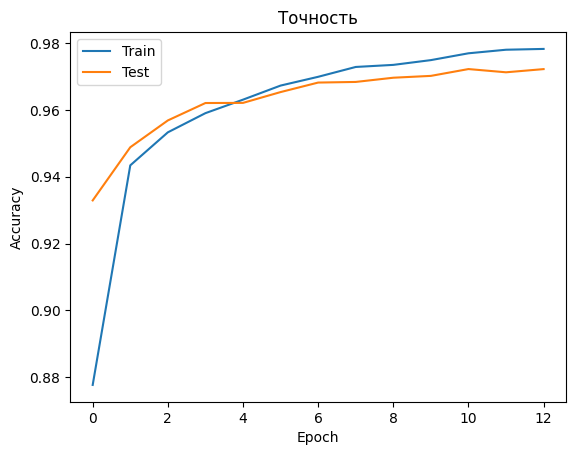

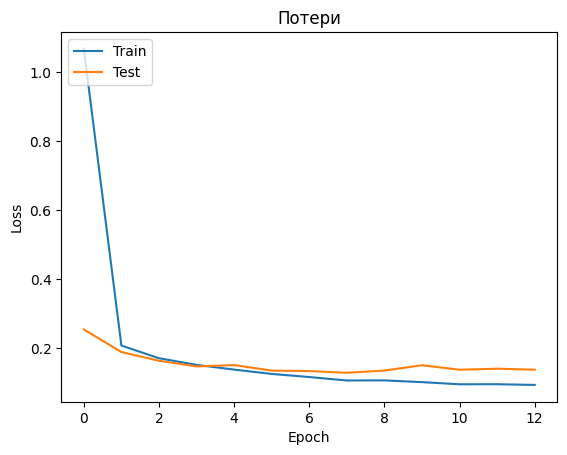

In [ ]:
import matplotlib.pyplot as plt

# Рисуем графики точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Рисуем графики потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Выводы:

1. Точность на тестовой выборке составила около 97%.
2. Графики точности и потерь показывают, что модель переобучается.
3. Изменение количества эпох на большее не имеет смысла, т.к. мы добились необходимого результата в 97%.